In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects

In [2]:
plt.style.use('ggplot')

In [3]:
cc = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Args

In [4]:
EXP = "exp3"
PRJ = "blast"

## Plotting directory

In [5]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" + EXP + "/" + PRJ + "/"

## Input data

In [6]:
BLAST_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC/" + PRJ + "/"

In [11]:
HEAD_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/cutadapt_naming/no_adapters/headers/annotated_headers.lst"

In [8]:
QT_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/barcode_buildingblock_stats/IONTORRENT.R1.gems.no_umi.quality_trimmed/read_ids.lst"
QT_SHORT_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/barcode_buildingblock_stats/IONTORRENT.R1.gems.no_umi.quality_trimmed.too_short/read_ids.lst"
QT_LONG_FILE = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/barcode_buildingblock_stats/IONTORRENT.R1.gems.no_umi.quality_trimmed.too_long/read_ids.lst"

## Output data

In [9]:
QT_OUT = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/barcode_buildingblock_stats/IONTORRENT.R1.gems.no_umi.quality_trimmed/mapped_read_ids.lst"

# Main

## Load read headers

In [22]:
head_df = pd.read_csv(HEAD_FILE, sep=" ", names=['query_id', 'gem', 'tso', 'b_primer', 'anneal', 'cd8_primer', 'mhc_primer'])
head_df['a_primer'] = np.where(head_df.cd8_primer == 'no_adapter', head_df.mhc_primer, head_df.cd8_primer)
head_df.replace('no_adapter', np.NaN, inplace=True)
head_df['match'] = head_df.loc[:, ['tso', 'b_primer', 'anneal', 'a_primer']].count(axis=1)

## Annotate BLAST with read headers

In [23]:
data_categories = {'expected_templates':{'TSO':(0, 13, cc[3]), 'Primer_B':(13, 19, cc[0]),'N6':(32, 6, cc[4]),'Oligo_B':(38, 25, cc[2]),'Anneal':(63, 25, cc[1]),'Oligo_A':(88, 25, cc[2]),'N6-':(113, 6, cc[4]),'Primer_A':(119, 18, cc[0]),'ID':(137, 8, cc[5])},
                   'overrep_seq_templates':{'TSO':(0, 13, cc[3]), 'Some_sequence':(13, 70, cc[4])},
                   'reversed_templates':{'TSO':(0, 13, cc[3]),'ID':(13, 8, cc[5]),'Primer_A':(21, 18, cc[0]),'N6-':(39, 6, cc[4]),'Oligo_A':(45, 25, cc[2]),'Anneal':(70, 25, cc[1]),'Oligo_B':(95, 25, cc[2]),'N6':(120, 6, cc[4]),'Primer_B':(126, 19, cc[0])},
                   'rev_templates_start':{'TSO':(0, 13, cc[3]),'ID':(13, 8, cc[5]),'Primer_A':(21, 18, cc[0])}}



blast_hit_count, read_hits = dict(), dict()

for data_category in data_categories:
    print(data_category)
    
    BLAST_TABLE = BLAST_DIR + data_category + "/blast.tsv"
    OUT_TABLE = BLAST_DIR + data_category + "/blast.annotated.tsv"
    
    # Load data
    blast_df = pd.read_csv(BLAST_TABLE, sep="\t", names=['query_id', 'template_id', 'identity', 'alignment_length',
                                                         'mismatches', 'gap_openings', 'q_alignment_start',
                                                         'q_alignment_end', 't_alignment_start', 't_alignment_end',
                                                         'e-value', 'bit_score'])
    
    # Get best BLAST hit
    #uniq_blast_df = blast_df.sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])
    
    #blast_hit_count[data_category] = uniq_blast_df.shape[0]
    
    #read_hits[data_category] = set(uniq_blast_df.query_id.to_list())
    
    ann_df = pd.merge(blast_df, head_df[['query_id','gem','tso','b_primer','anneal','a_primer','match']], how='left', on=['query_id'])
    ann_df.to_csv(OUT_TABLE, sep="\t", index=False)
    
    # Sort BLAST hits according to unique templates
    # template_counts_df = uniq_blast_df.set_index(['template_id', 'query_id']).count(level='template_id').sort_values('identity', ascending=False)
    
    ################################################################################################################
    ###                                                PLOTTING                                                  ###
    ################################################################################################################
    
    ## Plot
    #title = "Read counts for each BLAST template"
    #fig = plt.figure(figsize=(14,6))
    #plt.bar(x=template_counts_df.index, height=template_counts_df.identity)
    #plt.title(title)
    #plt.xlabel("Template IDs")
    #plt.ylabel("Read counts")
    #plt.xticks(rotation=90, fontsize=4) # ha='right', 
    #plt.xlim(-0.5,len(template_counts_df.index)-.5) # Remove empty margins within plot
    #
    #plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".pdf", bbox_inches='tight')
    ##plt.show()
#
    ## Plot
    #title = "Distributions of alignment metrics"
    #fig, axs = plt.subplots(1, 4, figsize=(18, 6))
    #axs[0].hist(uniq_blast_df.identity, bins=range(100+2))
    #axs[1].hist(uniq_blast_df.alignment_length, bins=range(max(uniq_blast_df.alignment_length)+2))
    #axs[2].hist(uniq_blast_df.mismatches, bins=range(max(uniq_blast_df.mismatches)+2))
    #axs[3].hist(uniq_blast_df.gap_openings, bins=range(max(uniq_blast_df.gap_openings)+2))
    #
    #axs[0].set_ylabel("Frequency")
    #axs[0].set_xlabel("Identity")
    #axs[1].set_xlabel("Alignment length")
    #axs[2].set_xlabel("Mismatches")
    #axs[3].set_xlabel("Gap openings")
    #fig.suptitle(title, fontsize=16)
    #
    #plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".pdf", bbox_inches='tight')
    ##plt.show()
#
    ## Plot
    #title = "Alignment positions"
    ## Set up the axes with gridspec
    #fig = plt.figure(figsize=(14, 6))
    #grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
    ## Main
    #main_ax = plt.subplot(grid[0, 0])
    #main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
    #                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
    #main = plt.xlim(-3,175) # Variable!
    #main = plt.xlabel("Alignment positions in template")
    #main = plt.ylabel("Alignment positions in query")
    #main = plt.title(title)
    ## Subs
    #subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
    ## Add template design
    #for k, v in data_categories[data_category].items():
    #    print(k,v)
    #    # Create a Rectangle patch
    #    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    #    subs_ax.add_patch(rect)
    #    # Add text
    #    block = " ".join(k.split("_")).split("-")[0]
    #    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
    #                       size=15, weight='heavy')
    #    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       
    ##title = "Alignment positions"
    ##fig = plt.figure(figsize=(14,6))
    #
    ##plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
    ##         [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
    ##plt.xlabel("Alignment positions in template")
    ##plt.ylabel("Alignment positions in query")
    ##plt.title(title)
    ##
    #plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
    ##plt.show()

expected_templates


KeyboardInterrupt: 

In [78]:
import webcolors as wbc
cc_rgb = [tuple(int(h.lstrip("#")[i:i+2], 16) for i in (0, 2, 4)) for h in cc]
cc_rgb

SyntaxError: Generator expression must be parenthesized (<ipython-input-78-145de423a332>, line 2)

In [76]:
color_tmp = cc_rgb * round(len(uniq_blast_df.t_alignment_start.to_list())/float(len(cc)))
len(color_tmp[:-1])

132

In [83]:
plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
         [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], color=color_tmp)
plt.axis('equal')
plt.show()

ValueError: Invalid RGBA argument: [(226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184), (226, 74, 51), (52, 138, 189), (152, 142, 213), (119, 119, 119), (251, 193, 94), (142, 186, 66), (255, 181, 184)]

<Figure size 432x288 with 1 Axes>

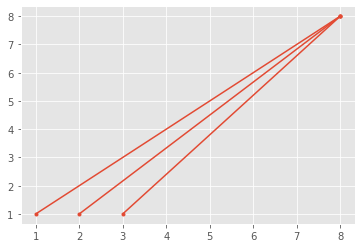

In [100]:
a = plt.plot([[1,2,3], [8,8,8]],
         [[1,1,1],[8,8,8]], '.-', c="#E24A33", label="%i hej" %2)

plt.show()

In [97]:
colors = (i + j for j in 'o<.' for i in 'bgrcmyk')
labels = 'one two three four five six seven eight nine ten'.split()

for i, l, c  in zip(range(10), labels, colors):
    print(c)

bo
go
ro
co
mo
yo
ko
b<
g<
r<


In [89]:
for i in a:
    print(i.get_color())

#E24A33
#348ABD
#988ED5


## Plotting the number of hits in each BLAST search

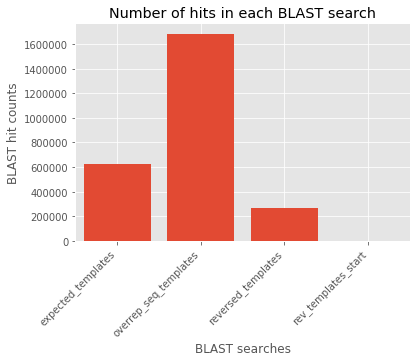

In [10]:
title = "Number of hits in each BLAST search"
fig = plt.figure()
plt.bar(x=blast_hit_count.keys(), height=blast_hit_count.values())
plt.title(title)
plt.xlabel("BLAST searches")
plt.ylabel("BLAST hit counts")
plt.xticks(rotation=45, ha='right')
plt.xlim(-0.5,len(blast_hit_count)-.5) # Remove empty margins within plot
plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".joined.pdf", bbox_inches='tight')

plt.show()

## Plotting intersection between hits

### BLAST category intersections

In [9]:
# Assumes that inputs are sets
a, b, c = read_hits['expected_templates'], read_hits['overrep_seq_templates'], read_hits['reversed_templates']

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

In [10]:
abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc

/anaconda3/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


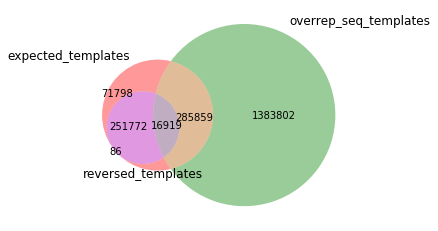

In [11]:
from matplotlib_venn import venn3

title = "Venn diagram of annotated reads from each BLAST search"
# Make the diagram
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('expected_templates', 'overrep_seq_templates', 'reversed_templates'))
plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".joined.pdf", bbox_inches='tight')
plt.show()

### Quality reads intersecting with expected templates and overrepresented sequences

In [12]:
quality_reads = np.loadtxt(QT_FILE, dtype=np.str)

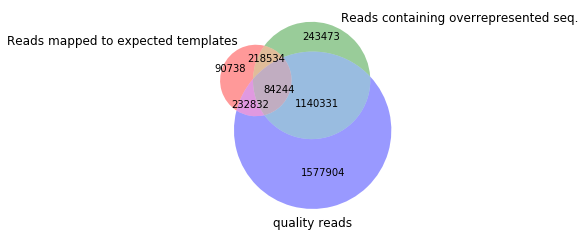

In [21]:
# Assumes that inputs are sets
a, b, c = read_hits['expected_templates'], read_hits['overrep_seq_templates'], set(quality_reads)

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc

from matplotlib_venn import venn3

title = "Venn diagram of quality reads mapped to expected templates and overrepresented sequences"
# Make the diagram
venn3(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('Reads mapped to expected templates', 'Reads containing overrepresented seq.', 'quality reads'))
plt.savefig(FIG_DIR + "_".join(title.split(" ")) + ".joined.pdf", bbox_inches='tight')
plt.show()


In [33]:
np.array(list(ab.intersection(c)))

array(['HBBAF:01148:01256', 'HBBAF:00362:01032', 'HBBAF:00439:00905', ...,
       'HBBAF:01168:02227', 'HBBAF:00616:01741', 'HBBAF:02504:02416'],
      dtype='<U17')

In [35]:
np.savetxt(QT_OUT, np.array(list(ab.intersection(c))), fmt='%s')

### Investigating intersections

In [10]:
BLAST_TABLE = BLAST_DIR + "expected_templates" + "/blast.tsv"
    
# Load data
blast_df = pd.read_csv(BLAST_TABLE, sep="\t", names=['query_id', 'template_id', 'identity', 'alignment_length',
                                                     'mismatches', 'gap_openings', 'q_alignment_start',
                                                     'q_alignment_end', 't_alignment_start', 't_alignment_end',
                                                     'e-value', 'bit_score'])

In [11]:
# Load header data
head_df = pd.read_csv(HEAD_FILE, sep=" ", names=['query_id', 'gem', 'tso', 'b_primer', 'anneal', 'cd8_primer', 'mhc_primer'])

In [16]:
head_df['a_primer'] = np.where(head_df.cd8_primer == 'no_adapter', head_df.mhc_primer, head_df.cd8_primer)

In [51]:
head_df.replace('no_adapter', np.NaN, inplace=True)

In [55]:
head_df['match'] = head_df.loc[:, ['b_primer', 'anneal', 'a_primer']].count(axis=1)

In [56]:
head_df.head()

,query_id,gem,tso,b_primer,anneal,cd8_primer,mhc_primer,a_primer,match
0,HBBAF:00961:02096,BX:Z:AAACCTGAGCTTTCAG-1,NaN,NaN,NaN,PRIMER_CD8,NaN,PRIMER_CD8,1
1,HBBAF:00735:00634,BX:Z:AAACCTGAGTATTGGA-1,NaN,PRIMER_B,NaN,NaN,NaN,NaN,1
2,HBBAF:00010:00452,BX:Z:AAACCTGAGTGAAGTT-1,TSO,NaN,NaN,NaN,NaN,NaN,0
3,HBBAF:00327:02439,BX:Z:AAACCTGAGTGAAGTT-1,TSO,NaN,NaN,NaN,NaN,NaN,0
4,HBBAF:00765:02333,BX:Z:AAACCTGAGTGAAGTT-1,TSO,NaN,NaN,NaN,NaN,NaN,0


In [19]:
ann_df = pd.merge(blast_df, head_df[['query_id','tso','b_primer','anneal','a_primer','match']], how='left', on=['query_id'])

In [37]:
ann_df.head(70)

,query_id,template_id,identity,alignment_length,mismatches,gap_openings,q_alignment_start,q_alignment_end,t_alignment_start,t_alignment_end,e-value,bit_score,tso,b_primer,anneal,a_primer
0,HBBAF:00961:02096,A4000B302_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
1,HBBAF:00961:02096,A4000B301_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
2,HBBAF:00961:02096,A4000B300_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
3,HBBAF:00961:02096,A4000B299_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
4,HBBAF:00961:02096,A4000B298_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
5,HBBAF:00961:02096,A4000B297_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
6,HBBAF:00961:02096,A4000B296_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
7,HBBAF:00961:02096,A4000B295_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
8,HBBAF:00961:02096,A4000B294_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8
9,HBBAF:00961:02096,A4000B293_bc25mer_51469,100.000,30,0,0,22,51,120,149,3.180000e-11,56.5,no_adapter,no_adapter,no_adapter,PRIMER_CD8


### ABC

(84244, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


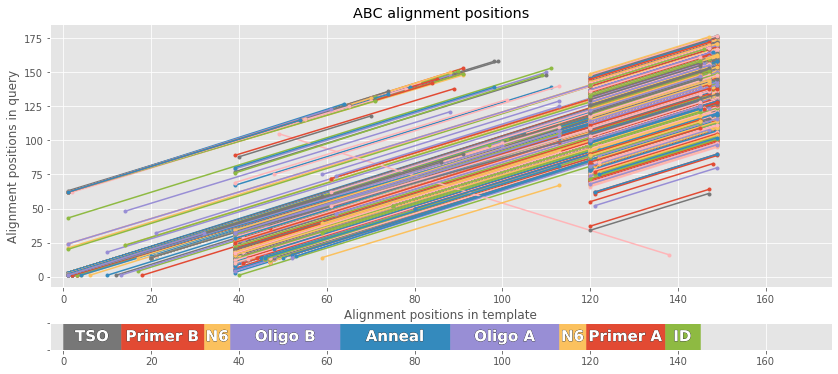

In [15]:
uniq_blast_df = blast_df[blast_df.query_id.isin(list(ab.intersection(c)))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
data_category = 'expected_templates'
title = "ABC alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories[data_category].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()

### AC - ABC

(232832, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


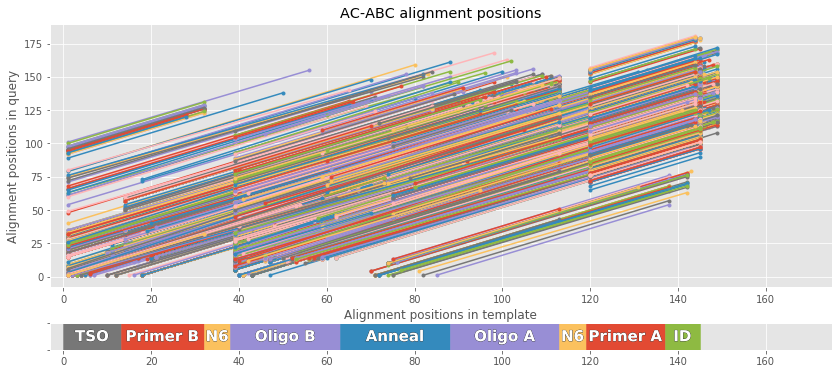

In [16]:
uniq_blast_df = blast_df[blast_df.query_id.isin(list(ac - ab.intersection(c)))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
data_category = 'expected_templates'
title = "AC-ABC alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories[data_category].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()

### AB - ABC

(218534, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


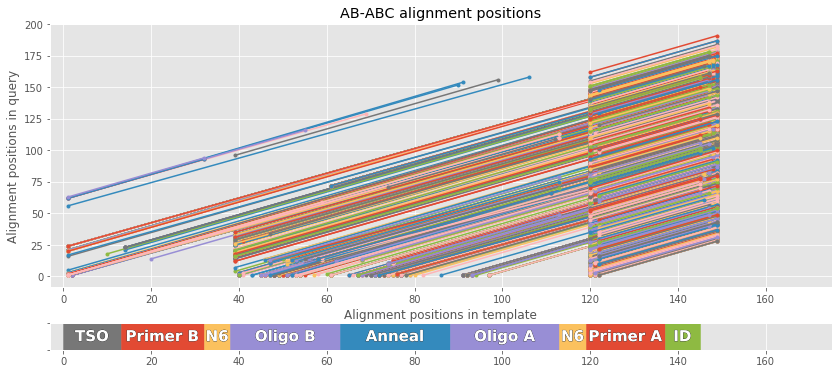

In [17]:
uniq_blast_df = blast_df[blast_df.query_id.isin(list(ab - ab.intersection(c)))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
data_category = 'expected_templates'
title = "AB-ABC alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories[data_category].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()

### A - AB - AC - ABC

(90738, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


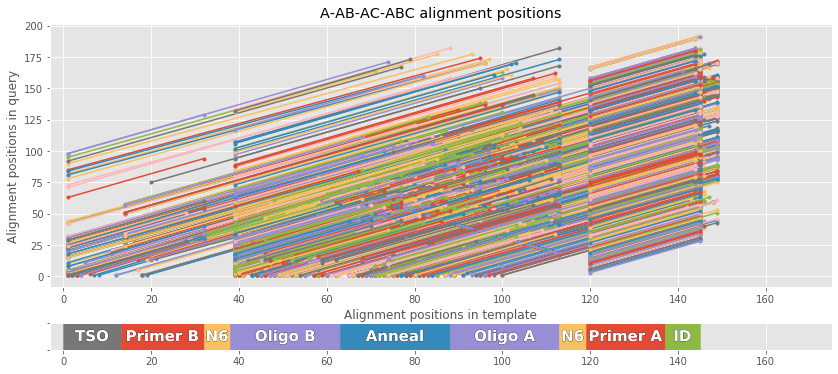

In [18]:
uniq_blast_df = blast_df[blast_df.query_id.isin(list(a - ab - ac - ab.intersection(c)))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
data_category = 'expected_templates'
title = "A-AB-AC-ABC alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories[data_category].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()

(317076, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


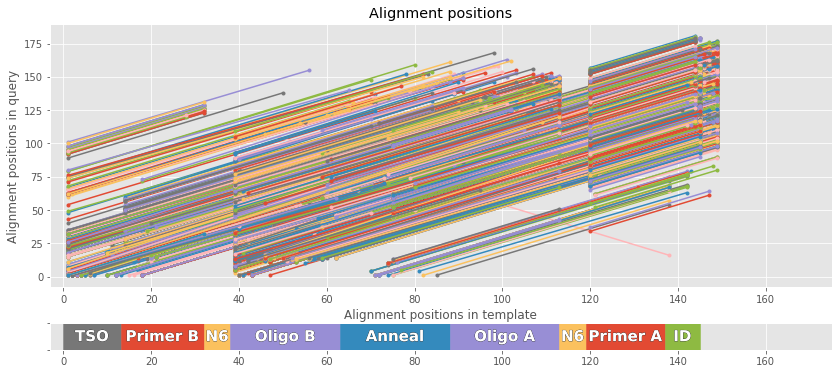

In [35]:
uniq_blast_df = blast_df[blast_df.query_id.isin(list(mr_qr_intersection))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
title = "Alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories['expected_templates'].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()

(309272, 12)
TSO (0, 13, '#777777')
Primer_B (13, 19, '#E24A33')
N6 (32, 6, '#FBC15E')
Oligo_B (38, 25, '#988ED5')
Anneal (63, 25, '#348ABD')
Oligo_A (88, 25, '#988ED5')
N6- (113, 6, '#FBC15E')
Primer_A (119, 18, '#E24A33')
ID (137, 8, '#8EBA42')


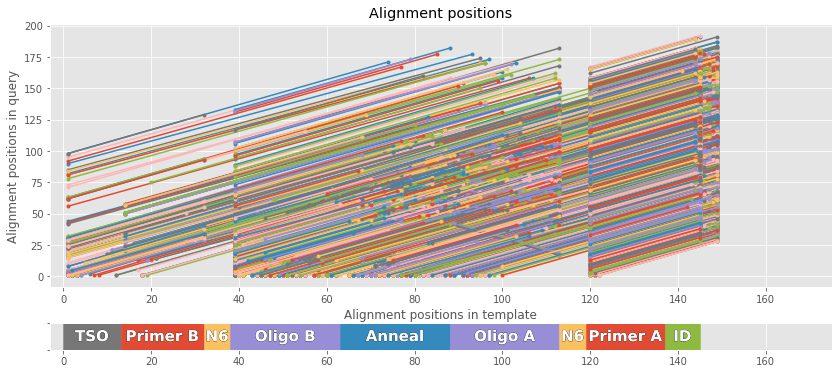

In [38]:
uniq_blast_df = blast_df[~blast_df.query_id.isin(list(mr_qr_intersection))].sort_values('bit_score', ascending=False).drop_duplicates(['query_id'])

print(uniq_blast_df.shape)

# Plot
title = "Alignment positions"
# Set up the axes with gridspec
fig = plt.figure(figsize=(14, 6))
grid = plt.GridSpec(2, 1, hspace=0.25, height_ratios=[10,1])
# Main
main_ax = plt.subplot(grid[0, 0])
main = plt.plot([uniq_blast_df.t_alignment_start.to_list(), uniq_blast_df.t_alignment_end.to_list()],
                [uniq_blast_df.q_alignment_start.to_list(),uniq_blast_df.q_alignment_end.to_list()], '.-')
main = plt.xlim(-3,175) # Variable!
main = plt.xlabel("Alignment positions in template")
main = plt.ylabel("Alignment positions in query")
main = plt.title(title)
# Subs
subs_ax = plt.subplot(grid[1, 0], yticklabels=[], sharex=main_ax)
# Add template design
for k, v in data_categories['expected_templates'].items():
    print(k,v)
    # Create a Rectangle patch
    rect = patches.Rectangle((v[0],0),v[1],1, fill=True, color=v[2]) #linewidth=1,edgecolor='r',facecolor='none'
    subs_ax.add_patch(rect)
    # Add text
    block = " ".join(k.split("_")).split("-")[0]
    txt = subs_ax.text(v[1]/2.0+v[0], 0.5, block, horizontalalignment='center', verticalalignment='center', color='white',
                       size=15, weight='heavy')
    txt.set_path_effects([PathEffects.withStroke(linewidth=0.5, foreground='black')])       


#plt.savefig(FIG_DIR + "_".join(title.split(" ")) + "_" + data_category + ".png", bbox_inches='tight')
plt.show()